In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

cancer_titles = pd.read_csv('csv-cancer-set.csv')[:1000]['Title']
virus_titles = pd.read_csv('csv-virus-set.csv')[:1000]['Title']

titles = list(cancer_titles) + list(virus_titles)
subtype = 1000*['cancer'] + 1000*['virus']
df = pd.DataFrame({'title': titles, 'subtype': subtype})
df

,title,subtype
0,[Lucy's cancer(s): A prehistorical origin?],cancer
1,Cancer prevention: from 1727 to milestones of ...,cancer
2,Tumor microenvironment: recent advances in var...,cancer
3,"Clinical, Prognostic and Therapeutic Significa...",cancer
4,Cancer-associated fibroblasts in tumor microen...,cancer
...,...,...
1995,The pathogenicity of Rous sarcoma virus for ma...,virus
1996,A novel nyavirus lacking matrix and glycoprote...,virus
1997,Prevalence and natural host range of Homalodis...,virus
1998,Enhanced bioinformatic profiling of VIDISCA li...,virus


In [6]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(df['title'])
X

<2000x4764 sparse matrix of type '<class 'numpy.int64'>'
	with 21775 stored elements in Compressed Sparse Row format>

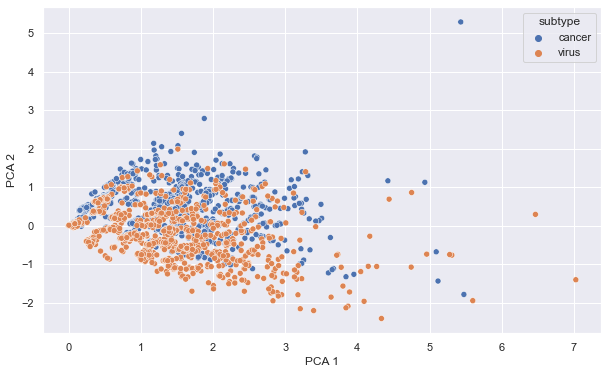

In [10]:
model = TruncatedSVD() # аналог PCA, который работает со sparse matrix
model.fit(X)
X_pca = model.transform(X)

df['PCA 1'] = X_pca[:, 0]
df['PCA 2'] = X_pca[:, 1]

sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(x='PCA 1', y='PCA 2', data = df, hue='subtype');

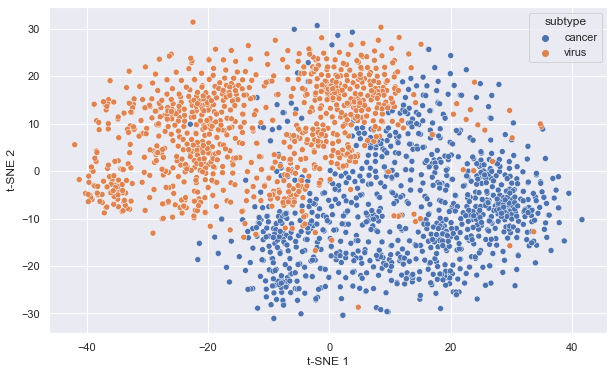

In [14]:
model = TSNE(n_components=2, perplexity=20)
X_tsne = model.fit_transform(X)

df['t-SNE 1'] = X_tsne[:, 0]
df['t-SNE 2'] = X_tsne[:, 1]

sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', data = df, hue='subtype');